In [232]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
df_test=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv' ,header=None)

In [235]:
df_train

0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
87549  0.396491  0.284211  0.136842  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87550  0.001667  0.000000  0.013333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87551  0.387755  0.322449  0.191837  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87552  0.121519  0.118987  0.103797  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87553  0.427578  0.395133  0.402086  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
87549  0.0  0.0  4.0  
87550  0.0  0.0  4.0  
87551  0.0  0.0  4.0  
87552  0.0  0.0  4.0  
87553  0.0  0.0  4.0  

[87554 rows x 188 columns]

In [236]:
df_test

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
21887  0.250575  0.140230  0.102299  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21888  0.077728  0.112108  0.152466  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21889  0.100890  0.106825  0.100890  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21890  0.488095  0.392857  0.238095  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21891  0.426247  0.325380  0.279826  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
21887  0.0  0.0  4.0  
21888  0.0  0.0  4.0  
21889  0.0  0.0  4.0  
21890  0.0  0.0  4.0  
21891  0.0  0.0  4.0  

[21892 rows x 188 columns]

In [237]:
df_train.shape,df_test.shape

((87554, 188), (21892, 188))

In [238]:
df_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [239]:
df_test.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [240]:
df_train.duplicated().sum() , df_test.duplicated().sum()

(0, 0)

In [241]:
df_train[187].unique()

array([0., 1., 2., 3., 4.])

In [242]:
#     0: "Normal beats",
#     1: "Unknown beats",
#     2: "Ventricular ectopic beats",
#     3: "Supraventrical ectopic beats",
#     4: "Fusion beats"

In [ ]:
df_train[187].value_counts()

Data is imbalanced we need to resample it 


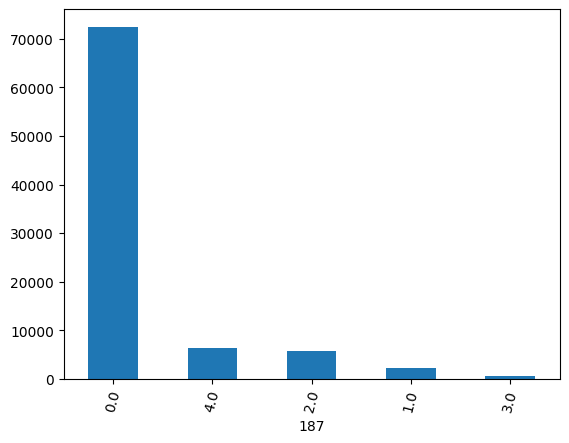

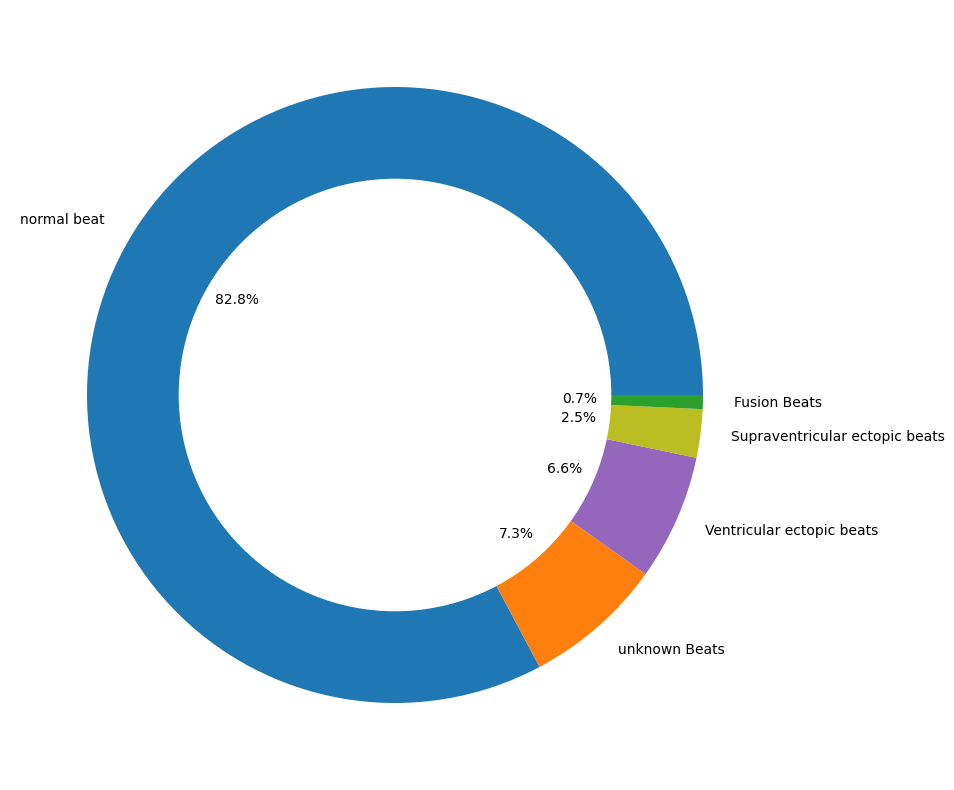

In [243]:
df_train[187].value_counts().plot(kind = 'bar', rot = 75)
plt.show()

per_class = df_train[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [244]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X = df_train.drop(187, axis=1)
y = df_train[187]
print(y.value_counts())
smote = SMOTE(k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)
print('Resampled dataset shape:', y_resampled.value_counts())

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64
Resampled dataset shape: 187
0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: count, dtype: int64


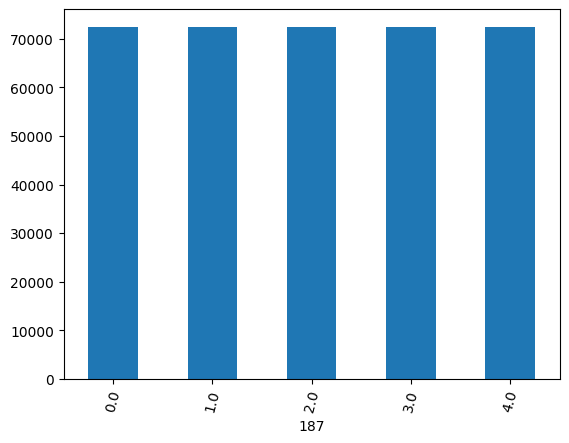

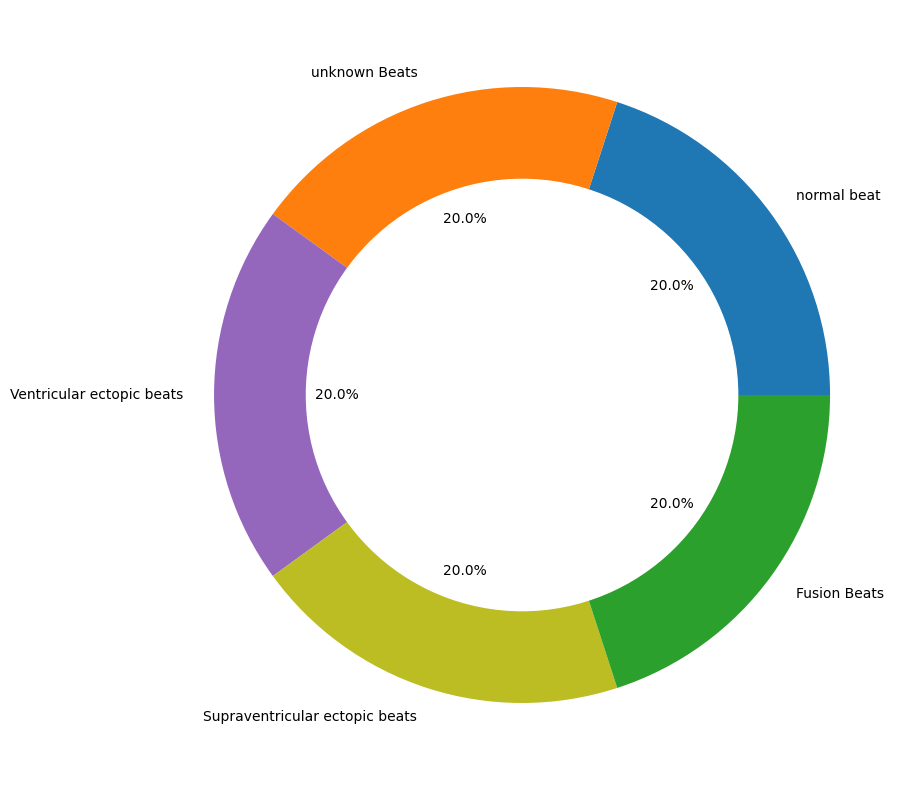

In [245]:
y_resampled.value_counts().plot(kind = 'bar', rot = 75 )
plt.show()
per_class = y_resampled.value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

PERFECTO

In [249]:
def plot_hist(class_number,size,min_):
    # get the class data
    img=df_train.loc[df_train[187]==class_number].values
    # crop it
    img=img[:,min_:size]
    # creates a continous steam of data
    img_flatten=img.flatten()
    
    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

4710615
4710615


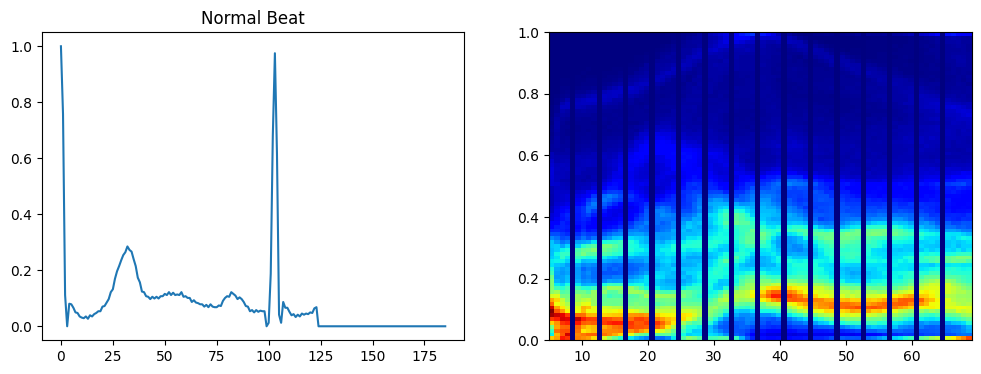

In [250]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(df_test.iloc[0,:186])
plt.title('Normal Beat')
plt.subplot(1, 2, 2)  
plot_hist(0,70,5)

100035
100035


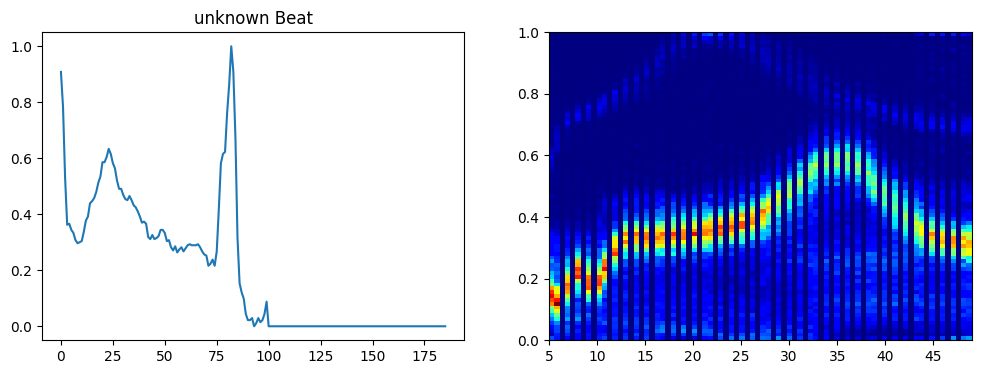

In [251]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(df_test.iloc[1,:186])
plt.title('unknown Beat')
plt.subplot(1, 2, 2)  
plot_hist(1,50,5)

173640
173640


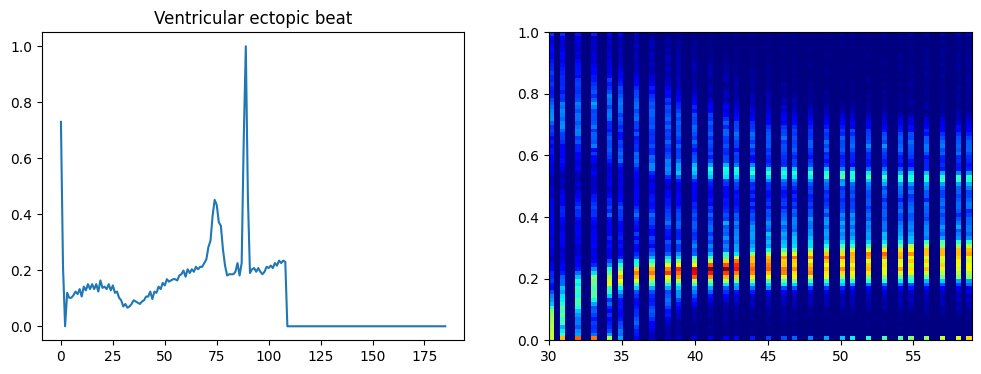

In [252]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)  
plt.plot(df_test.iloc[2,:186])
plt.title('Ventricular ectopic beat')
plt.subplot(1, 2, 2) 
plot_hist(2,60,30)

22435
22435


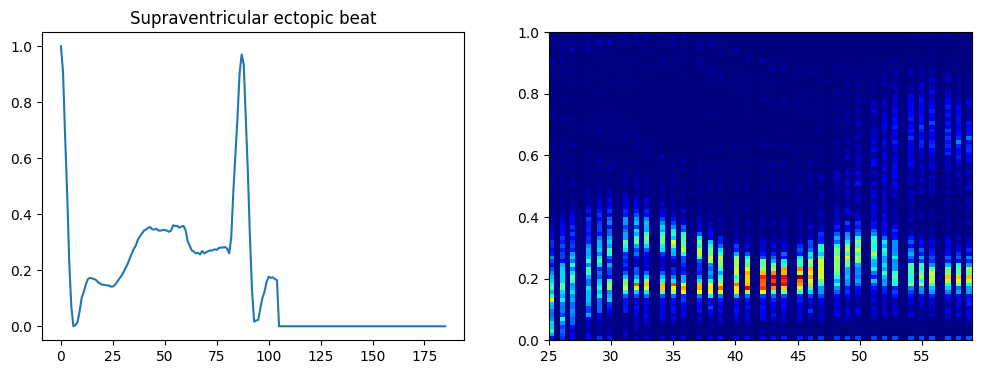

In [253]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1) 
plt.plot(df_test.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
plt.subplot(1, 2, 2) 
plot_hist(3,60,25)

205792
205792


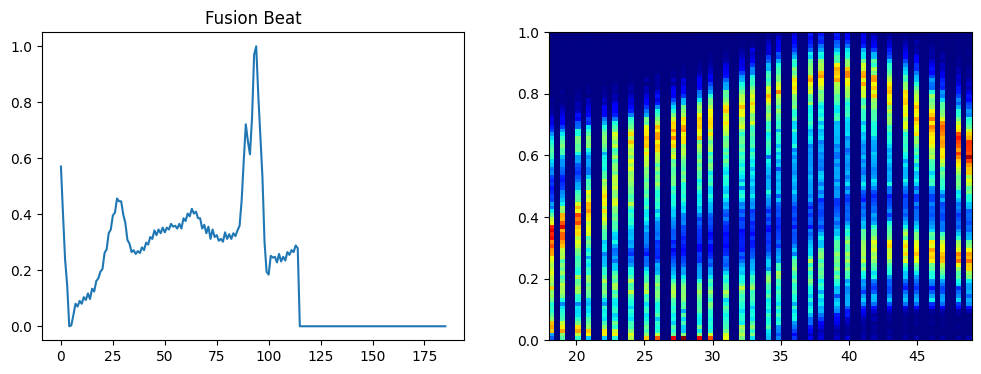

In [254]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)   
plt.plot(df_test.iloc[4,:186])
plt.title('Fusion Beat')
plt.subplot(1, 2, 2) 
plot_hist(4,50,18)

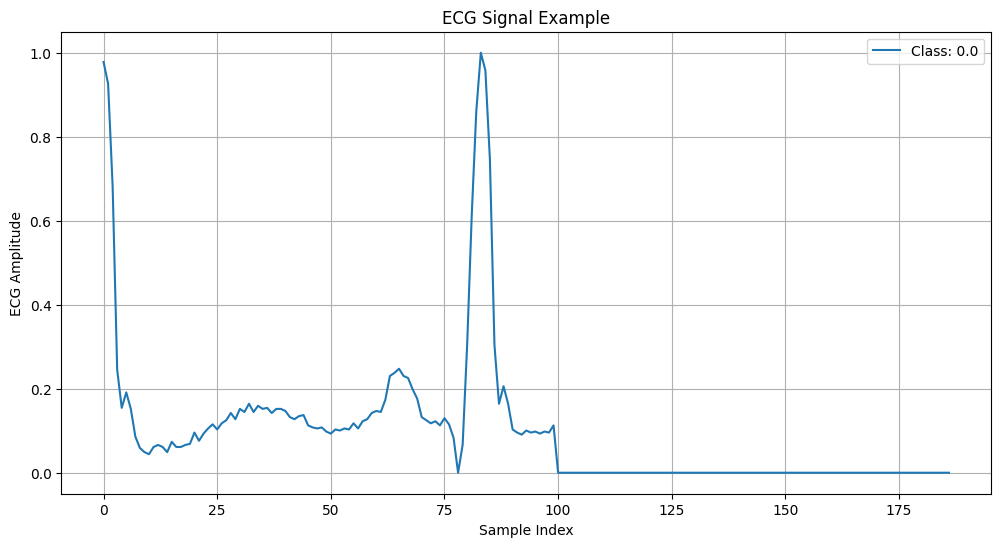

In [255]:
ecg_signals = df_train.iloc[:, :-1]  # All columns except the last
class_labels = df_train.iloc[:, -1]   # Last column for class labels

# Plot the first ECG signal as an example
plt.figure(figsize=(12, 6))
plt.plot(ecg_signals.iloc[0], label=f'Class: {class_labels.iloc[0]}')
plt.title('ECG Signal Example')
plt.xlabel('Sample Index')
plt.ylabel('ECG Amplitude')
plt.legend()
plt.grid()
plt.show()

# Train.csv model

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     14462
         1.0       0.98      0.99      0.98     14535
         2.0       0.98      0.99      0.99     14419
         3.0       0.99      1.00      1.00     14432
         4.0       0.99      1.00      1.00     14623

    accuracy                           0.99     72471
   macro avg       0.99      0.99      0.99     72471
weighted avg       0.99      0.99      0.99     72471

Confusion Matrix:
Accuracy Score:
0.9856080363179754


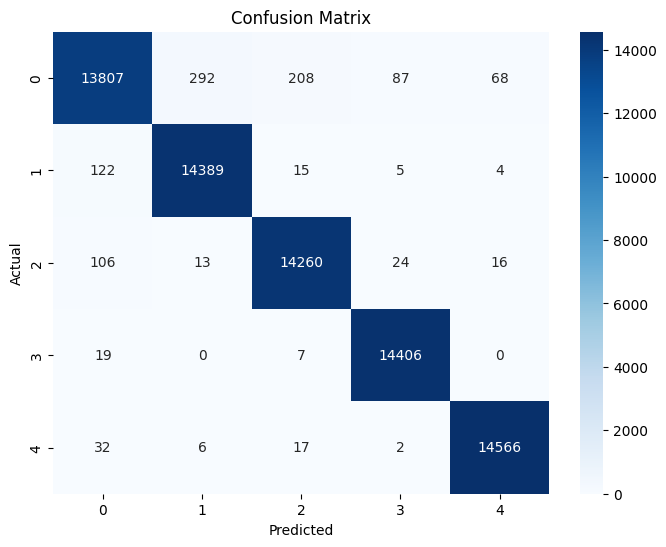

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     14462
         1.0       1.00      1.00      1.00     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471

Confusion Matrix:
[[14383    46    18     8     7]
 [   16 14519     0     0     0]
 [   19     0 14395     5     0]
 [    1     0     1 14430     0]
 [   10     0     4     0 14609]]
Accuracy Score:
0.9981371859088463


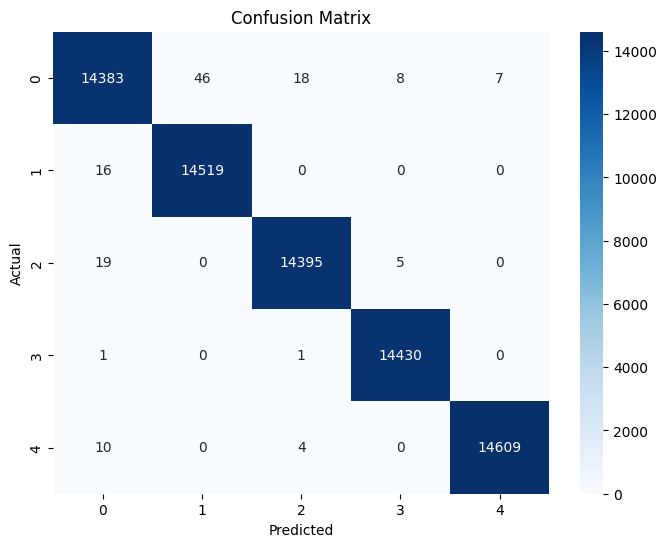

In [257]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Test.csv model 

In [258]:
X2 = df_test.drop(187, axis=1)
y2 = df_test[187]
print(y2.value_counts())
smote = SMOTE(k_neighbors=2) 
X2_resampled, y2_resampled = smote.fit_resample(X2, y2)
print('Original dataset shape:', Counter(y2))
print(y2_resampled.value_counts())

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64
Original dataset shape: Counter({0.0: 18118, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})
187
0.0    18118
1.0    18118
2.0    18118
3.0    18118
4.0    18118
Name: count, dtype: int64


In [260]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3625
         1.0       0.98      0.60      0.75       106
         2.0       0.97      0.85      0.90       289
         3.0       0.90      0.51      0.65        35
         4.0       0.99      0.92      0.95       324

    accuracy                           0.97      4379
   macro avg       0.96      0.78      0.85      4379
weighted avg       0.97      0.97      0.97      4379

Confusion Matrix:
[[3618    1    4    0    2]
 [  40   64    1    0    1]
 [  41    0  245    2    1]
 [  16    0    1   18    0]
 [  23    0    2    0  299]]
Accuracy Score:
0.9691710436172642


# Accuracy before using resampled x ,y 

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3587
         1.0       1.00      1.00      1.00      3650
         2.0       1.00      1.00      1.00      3622
         3.0       1.00      1.00      1.00      3647
         4.0       1.00      1.00      1.00      3612

    accuracy                           1.00     18118
   macro avg       1.00      1.00      1.00     18118
weighted avg       1.00      1.00      1.00     18118

Confusion Matrix:
[[3563   11    8    2    3]
 [   8 3642    0    0    0]
 [   2    0 3617    3    0]
 [   0    0    0 3647    0]
 [   2    0    0    0 3610]]
Accuracy Score:
0.9978474445303014


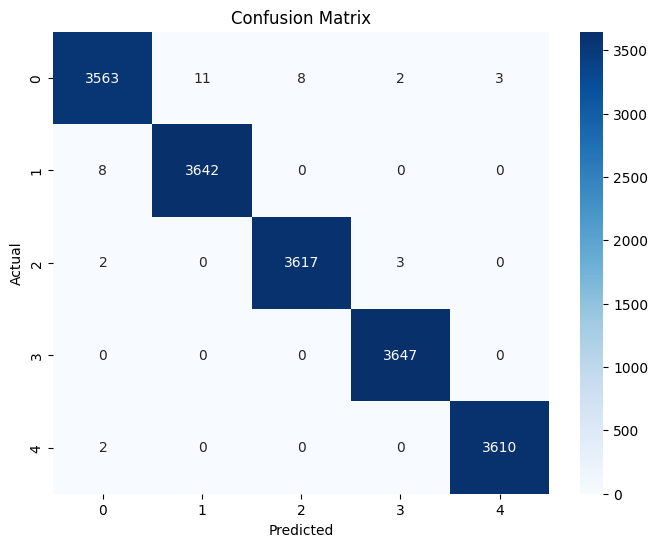

In [261]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X2_resampled, y2_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy After using resampled x ,y 

# =================================================================================================

In [263]:
df_normal=pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv' , header=None)
df_abnormal=pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv', header=None)


In [264]:
df_normal

0         1         2         3         4         5         6    \
0     1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1     1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2     0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3     1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4     1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...        ...       ...       ...       ...       ...       ...       ...   
4041  1.000000  0.929586  0.503550  0.293491  0.169822  0.159763  0.130769   
4042  1.000000  0.637579  0.154837  0.061983  0.088965  0.083374  0.065143   
4043  1.000000  0.872574  0.465071  0.232212  0.126132  0.155886  0.174644   
4044  0.915983  0.529373  0.288406  0.144536  0.171802  0.180669  0.177566   
4045  1.000000  0.838643  0.390567  0.191146  0.033513  0.055854  0.129086   

           7         8         9    ...  178  179  180  181  182  183  184  \
0     0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
4041  0.125444  0.137278  0.111243  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4042  0.057365  0.060039  0.060039  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4043  0.190168  0.203752  0.168823  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4044  0.176458  0.178896  0.180448  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4045  0.147290  0.155151  0.165494  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      185  186  187  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
4041  0.0  0.0  0.0  
4042  0.0  0.0  0.0  
4043  0.0  0.0  0.0  
4044  0.0  0.0  0.0  
4045  0.0  0.0  0.0  

[4046 rows x 188 columns]

In [265]:
df_abnormal

0         1         2         3         4         5         6    \
0      0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1      1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2      1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3      0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4      0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
...         ...       ...       ...       ...       ...       ...       ...   
10501  0.981409  1.000000  0.559171  0.287093  0.196639  0.204862  0.215946   
10502  0.906250  0.922379  0.878024  0.810484  0.712702  0.667339  0.608871   
10503  1.000000  0.867971  0.674122  0.470332  0.296987  0.169307  0.077664   
10504  1.000000  0.984672  0.658888  0.556394  0.446809  0.395790  0.315260   
10505  0.997886  0.700317  0.464059  0.318182  0.233615  0.184989  0.124207   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
10501  0.243833  0.242760  0.250268  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10502  0.527218  0.480847  0.442540  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10503  0.081392  0.074868  0.089779  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10504  0.276367  0.261039  0.258522  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10505  0.082981  0.087738  0.063953  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  1.0  
1      0.0  0.0  1.0  
2      0.0  0.0  1.0  
3      0.0  0.0  1.0  
4      0.0  0.0  1.0  
...    ...  ...  ...  
10501  0.0  0.0  1.0  
10502  0.0  0.0  1.0  
10503  0.0  0.0  1.0  
10504  0.0  0.0  1.0  
10505  0.0  0.0  1.0  

[10506 rows x 188 columns]

In [266]:
df_normal[187].value_counts()

187
0.0    4046
Name: count, dtype: int64

In [267]:
df_abnormal[187].value_counts()

187
1.0    10506
Name: count, dtype: int64

In [268]:
df_normal.isnull().sum() , df_abnormal.isnull().sum()

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 183    0
 184    0
 185    0
 186    0
 187    0
 Length: 188, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 183    0
 184    0
 185    0
 186    0
 187    0
 Length: 188, dtype: int64)

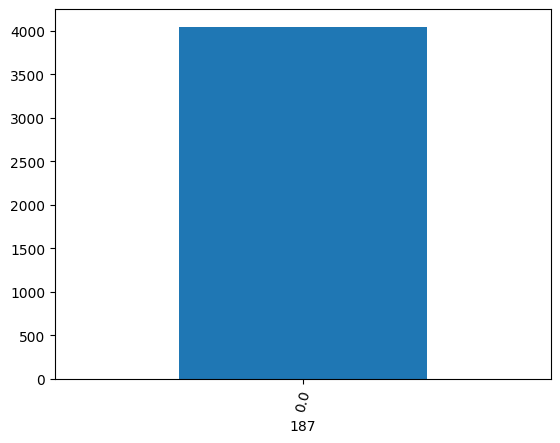

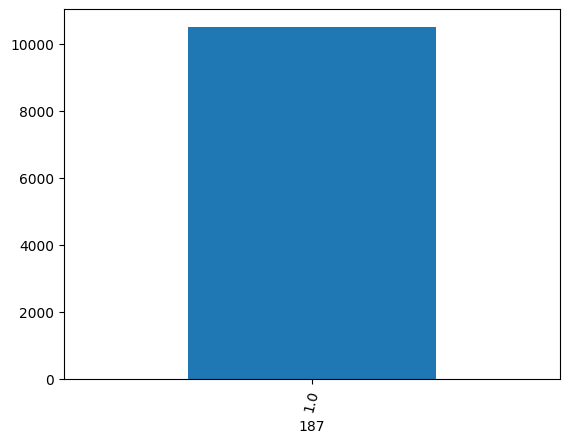

In [269]:
df_normal[187].value_counts().plot(kind = 'bar', rot = 75)
plt.show()
df_abnormal[187].value_counts().plot(kind = 'bar', rot = 75)
plt.show()

# =======================================================================================================

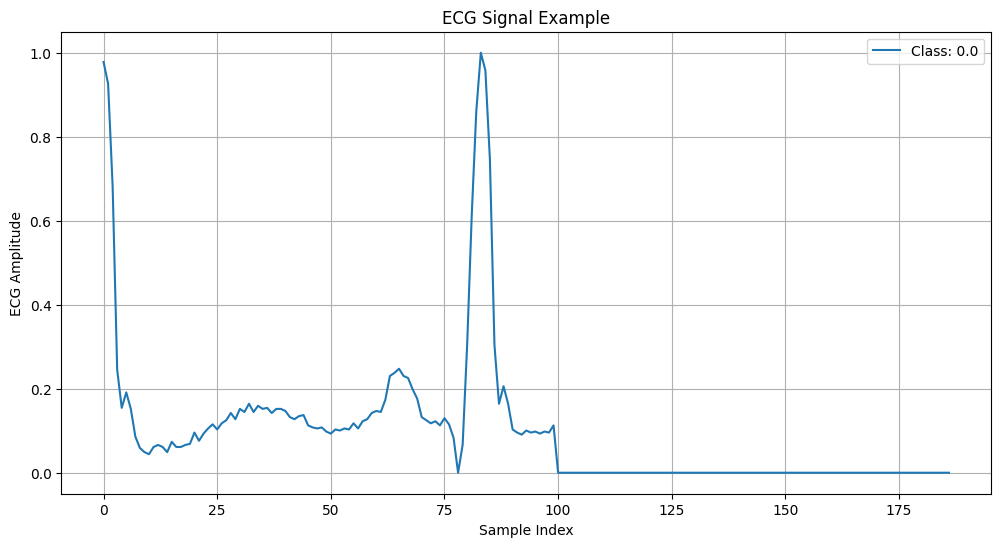

In [270]:
ecg_signals = df_train.iloc[:, :-1]  # All columns except the last
class_labels = df_train.iloc[:, -1]   # Last column for class labels

# Plot the first ECG signal as an example
plt.figure(figsize=(12, 6))
plt.plot(ecg_signals.iloc[0], label=f'Class: {class_labels.iloc[0]}')
plt.title('ECG Signal Example')
plt.xlabel('Sample Index')
plt.ylabel('ECG Amplitude')
plt.legend()
plt.grid()
plt.show()

**A frequency of 125 means that the wave repeats itself every 125 columns. After column 125, you will find that the remaining columns are redundant. It's okay to drop them.**

In [271]:
df_train=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv' , header=None)
df_train

0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
87549  0.396491  0.284211  0.136842  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87550  0.001667  0.000000  0.013333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87551  0.387755  0.322449  0.191837  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87552  0.121519  0.118987  0.103797  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87553  0.427578  0.395133  0.402086  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
87549  0.0  0.0  4.0  
87550  0.0  0.0  4.0  
87551  0.0  0.0  4.0  
87552  0.0  0.0  4.0  
87553  0.0  0.0  4.0  

[87554 rows x 188 columns]

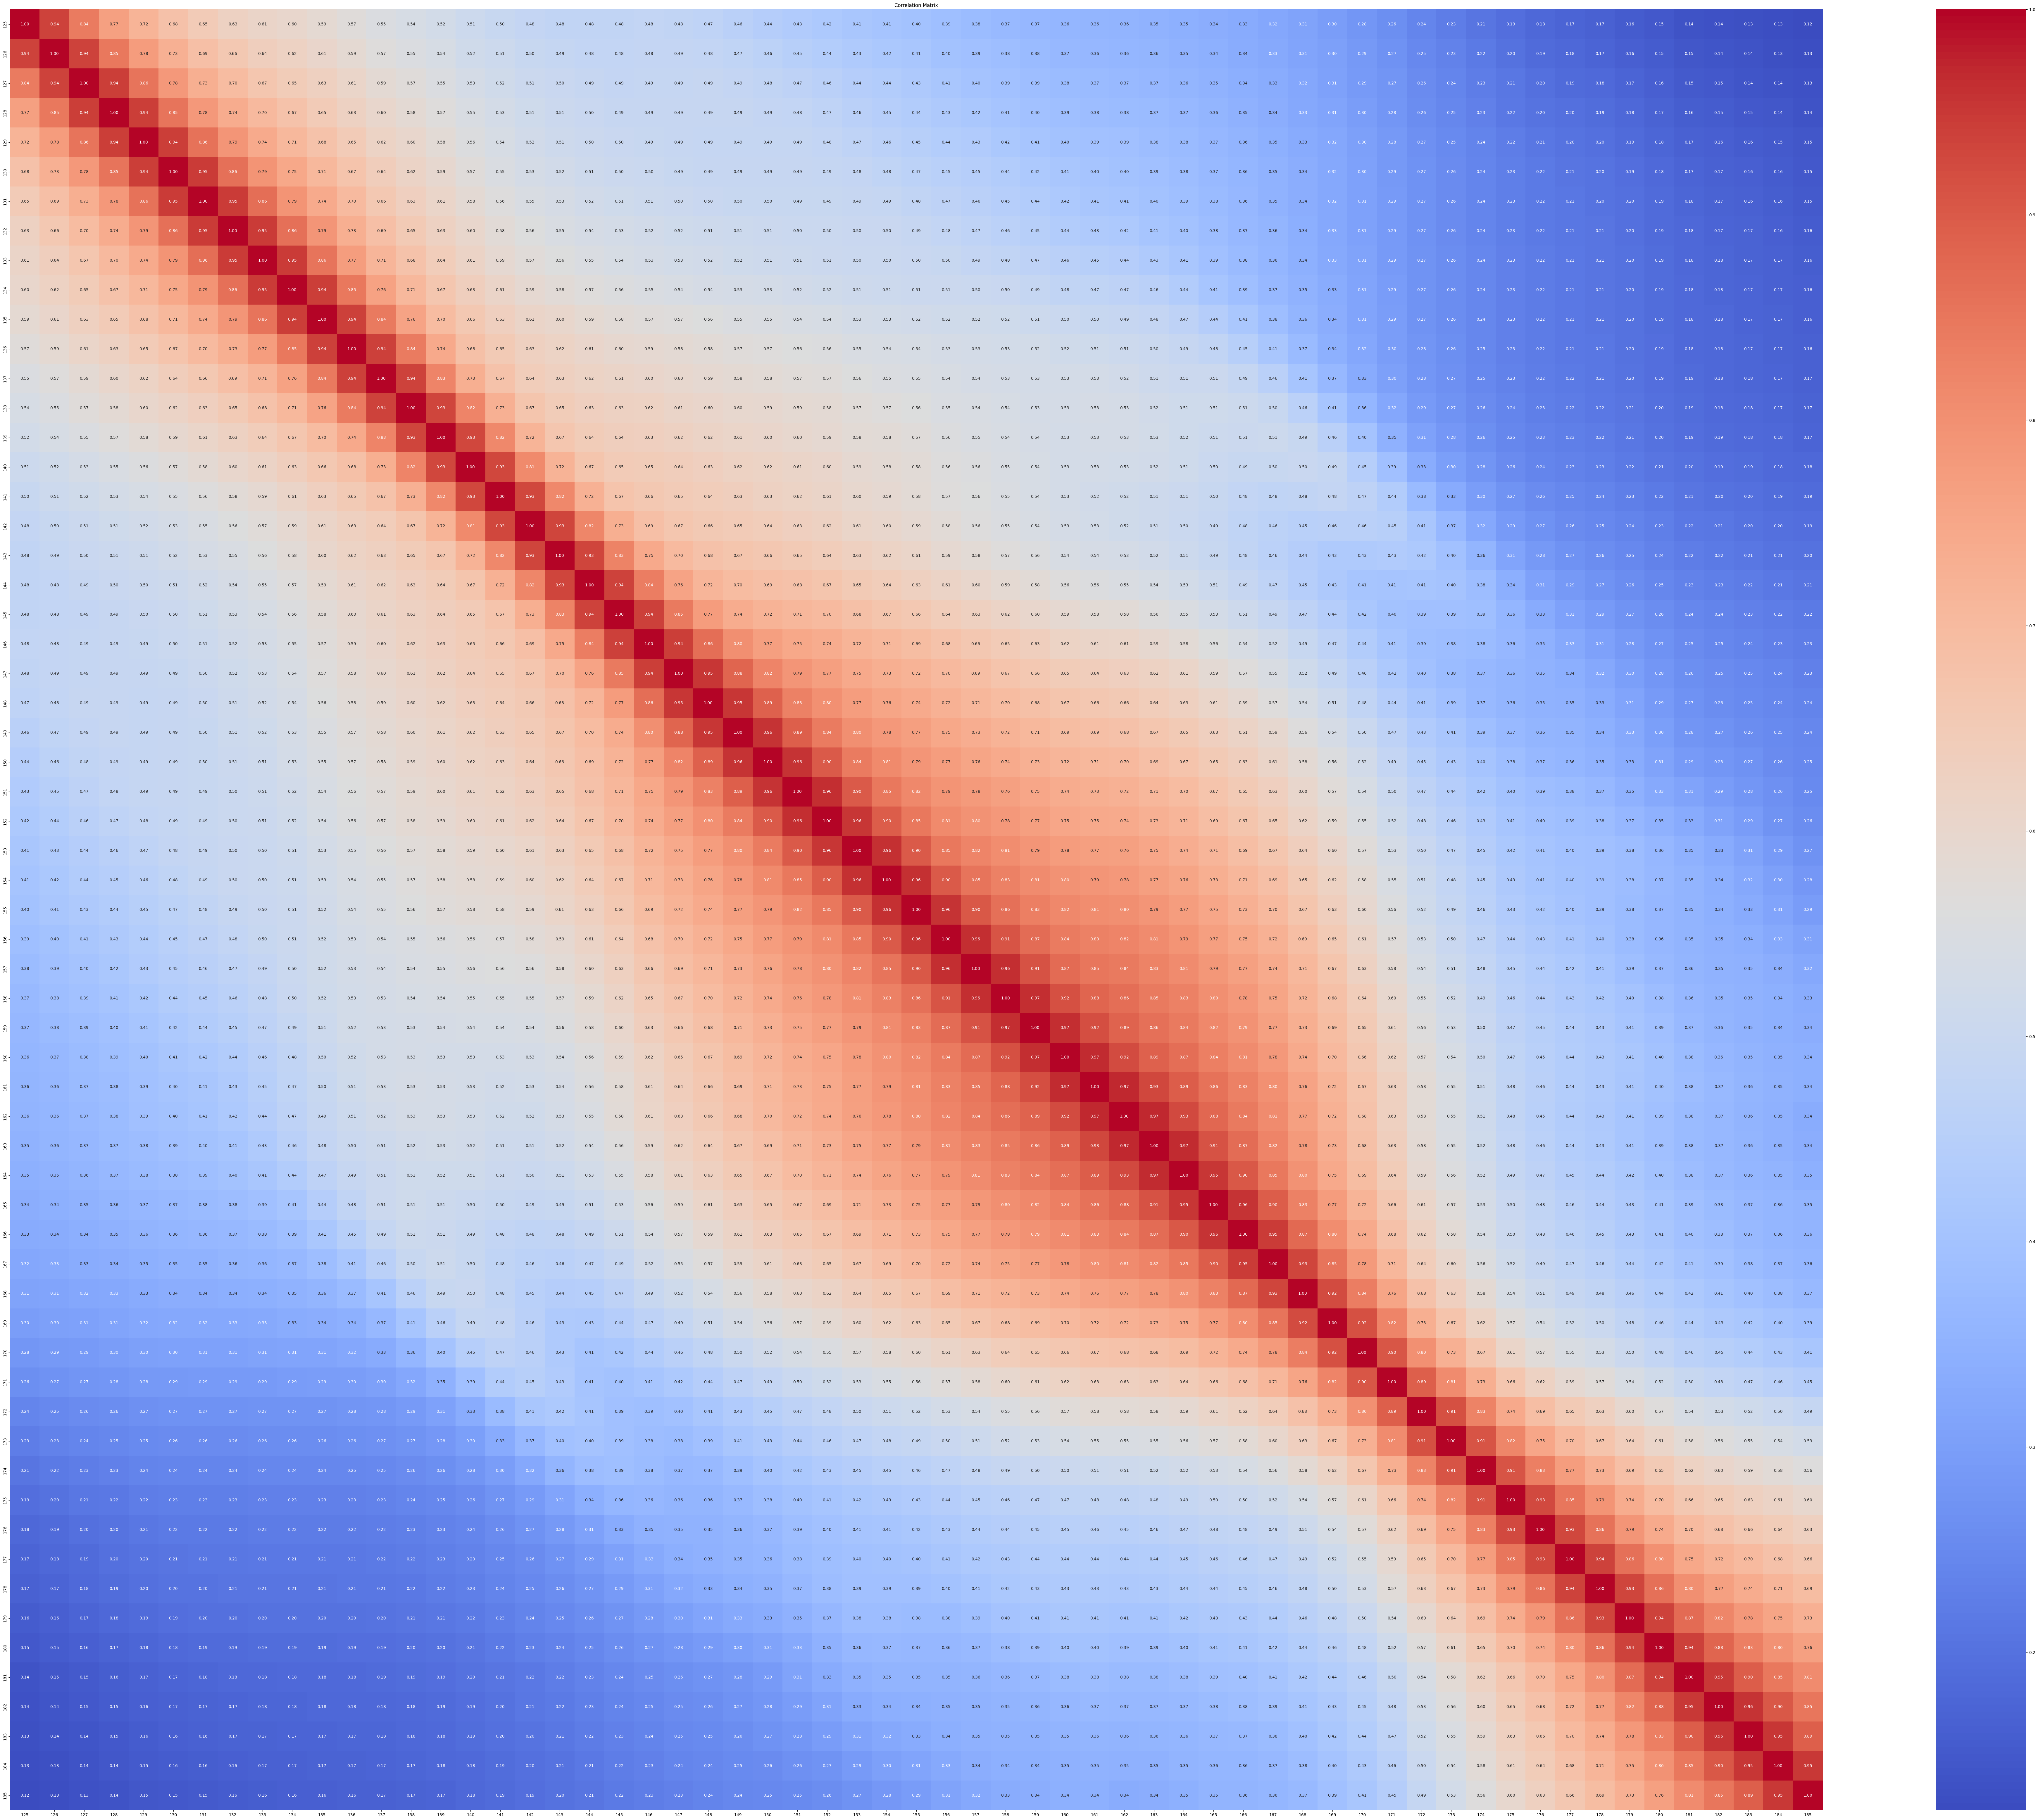

In [272]:
corr_matrix = df_train.iloc[:, 125:186].corr()
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [273]:
columns_to_drop = list(range(126, 187))
train_dropped = df_test.drop(columns=df_test.columns[columns_to_drop])
train_dropped

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...       117       118       119  \
0      0.049587  0.047521  0.035124  ...  0.041322  0.045455  0.043388   
1      0.307692  0.296703  0.300366  ...  0.000000  0.000000  0.000000   
2      0.123894  0.115044  0.132743  ...  0.000000  0.000000  0.000000   
3      0.004167  0.014583  0.054167  ...  0.000000  0.000000  0.000000   
4      0.080537  0.070470  0.090604  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
21887  0.250575  0.140230  0.102299  ...  0.316092  0.332184  0.347126   
21888  0.077728  0.112108  0.152466  ...  0.472347  0.535127  0.581465   
21889  0.100890  0.106825  0.100890  ...  0.106825  0.118694  0.109792   
21890  0.488095  0.392857  0.238095  ...  0.202381  0.238095  0.226190   
21891  0.426247  0.325380  0.279826  ...  0.187636  0.238612  0.250542   

            120       121       122       123       124  125  187  
0      0.049587  0.047521  0.064050  0.068182  0.000000  0.0  0.0  
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
...         ...       ...       ...       ...       ...  ...  ...  
21887  0.393103  0.000000  0.000000  0.000000  0.000000  0.0  4.0  
21888  0.635277  0.656203  0.687593  0.684604  0.698057  0.0  4.0  
21889  0.112760  0.103858  0.000000  0.000000  0.000000  0.0  4.0  
21890  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  4.0  
21891  0.267896  0.251627  0.000000  0.000000  0.000000  0.0  4.0  

[21892 rows x 127 columns]

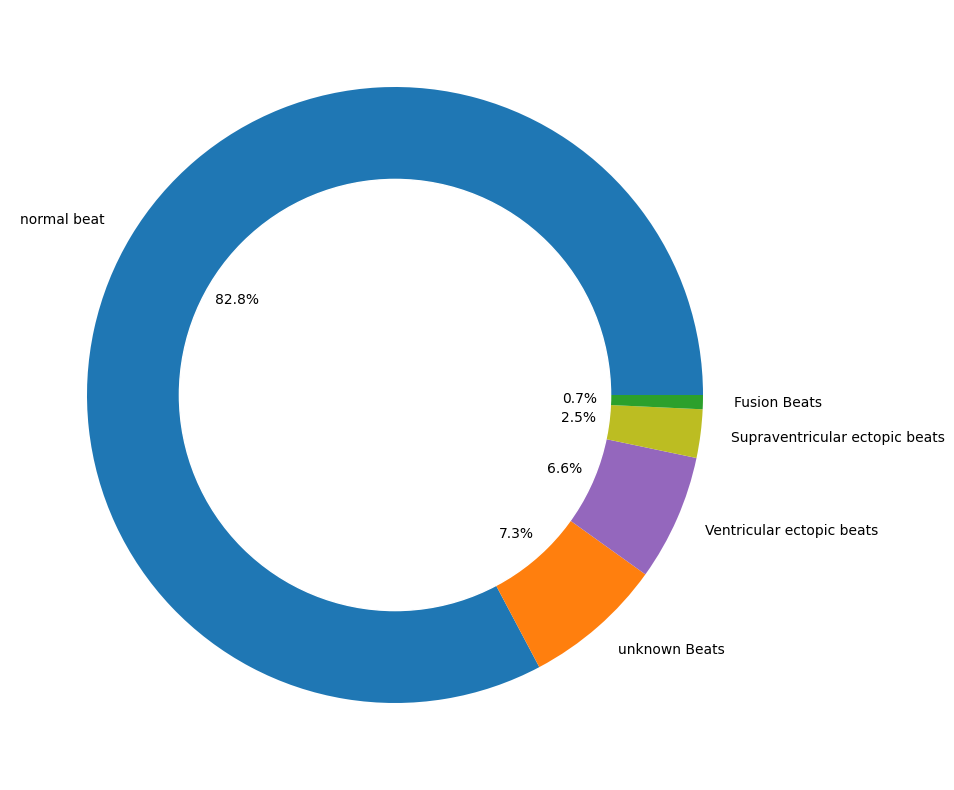

In [274]:
per_class = train_dropped[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [275]:
X4 = df_test.drop(187, axis=1)
y4 = df_test[187]
print(y2.value_counts())
smote = SMOTE(k_neighbors=2) 
X4_resampled, y4_resampled = smote.fit_resample(X4, y4)
print('Original dataset shape:', Counter(y2))
print(y2_resampled.value_counts())

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64
Original dataset shape: Counter({0.0: 18118, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})
187
0.0    18118
1.0    18118
2.0    18118
3.0    18118
4.0    18118
Name: count, dtype: int64


Confusion Matrix:
[[3563   12    8    2    2]
 [   3 3647    0    0    0]
 [   3    0 3618    1    0]
 [   1    0    0 3646    0]
 [   3    0    0    0 3609]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3587
         1.0       1.00      1.00      1.00      3650
         2.0       1.00      1.00      1.00      3622
         3.0       1.00      1.00      1.00      3647
         4.0       1.00      1.00      1.00      3612

    accuracy                           1.00     18118
   macro avg       1.00      1.00      1.00     18118
weighted avg       1.00      1.00      1.00     18118

Accuracy Score:
0.9980682194502705


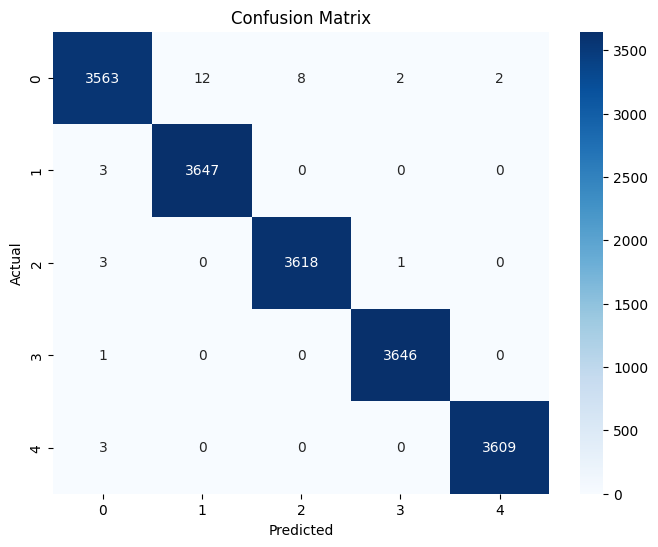

In [276]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X4_resampled, y4_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# =======================================================================================================

In [277]:
df_test=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv' , header=None)
df_test

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
21887  0.250575  0.140230  0.102299  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21888  0.077728  0.112108  0.152466  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21889  0.100890  0.106825  0.100890  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21890  0.488095  0.392857  0.238095  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21891  0.426247  0.325380  0.279826  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
21887  0.0  0.0  4.0  
21888  0.0  0.0  4.0  
21889  0.0  0.0  4.0  
21890  0.0  0.0  4.0  
21891  0.0  0.0  4.0  

[21892 rows x 188 columns]

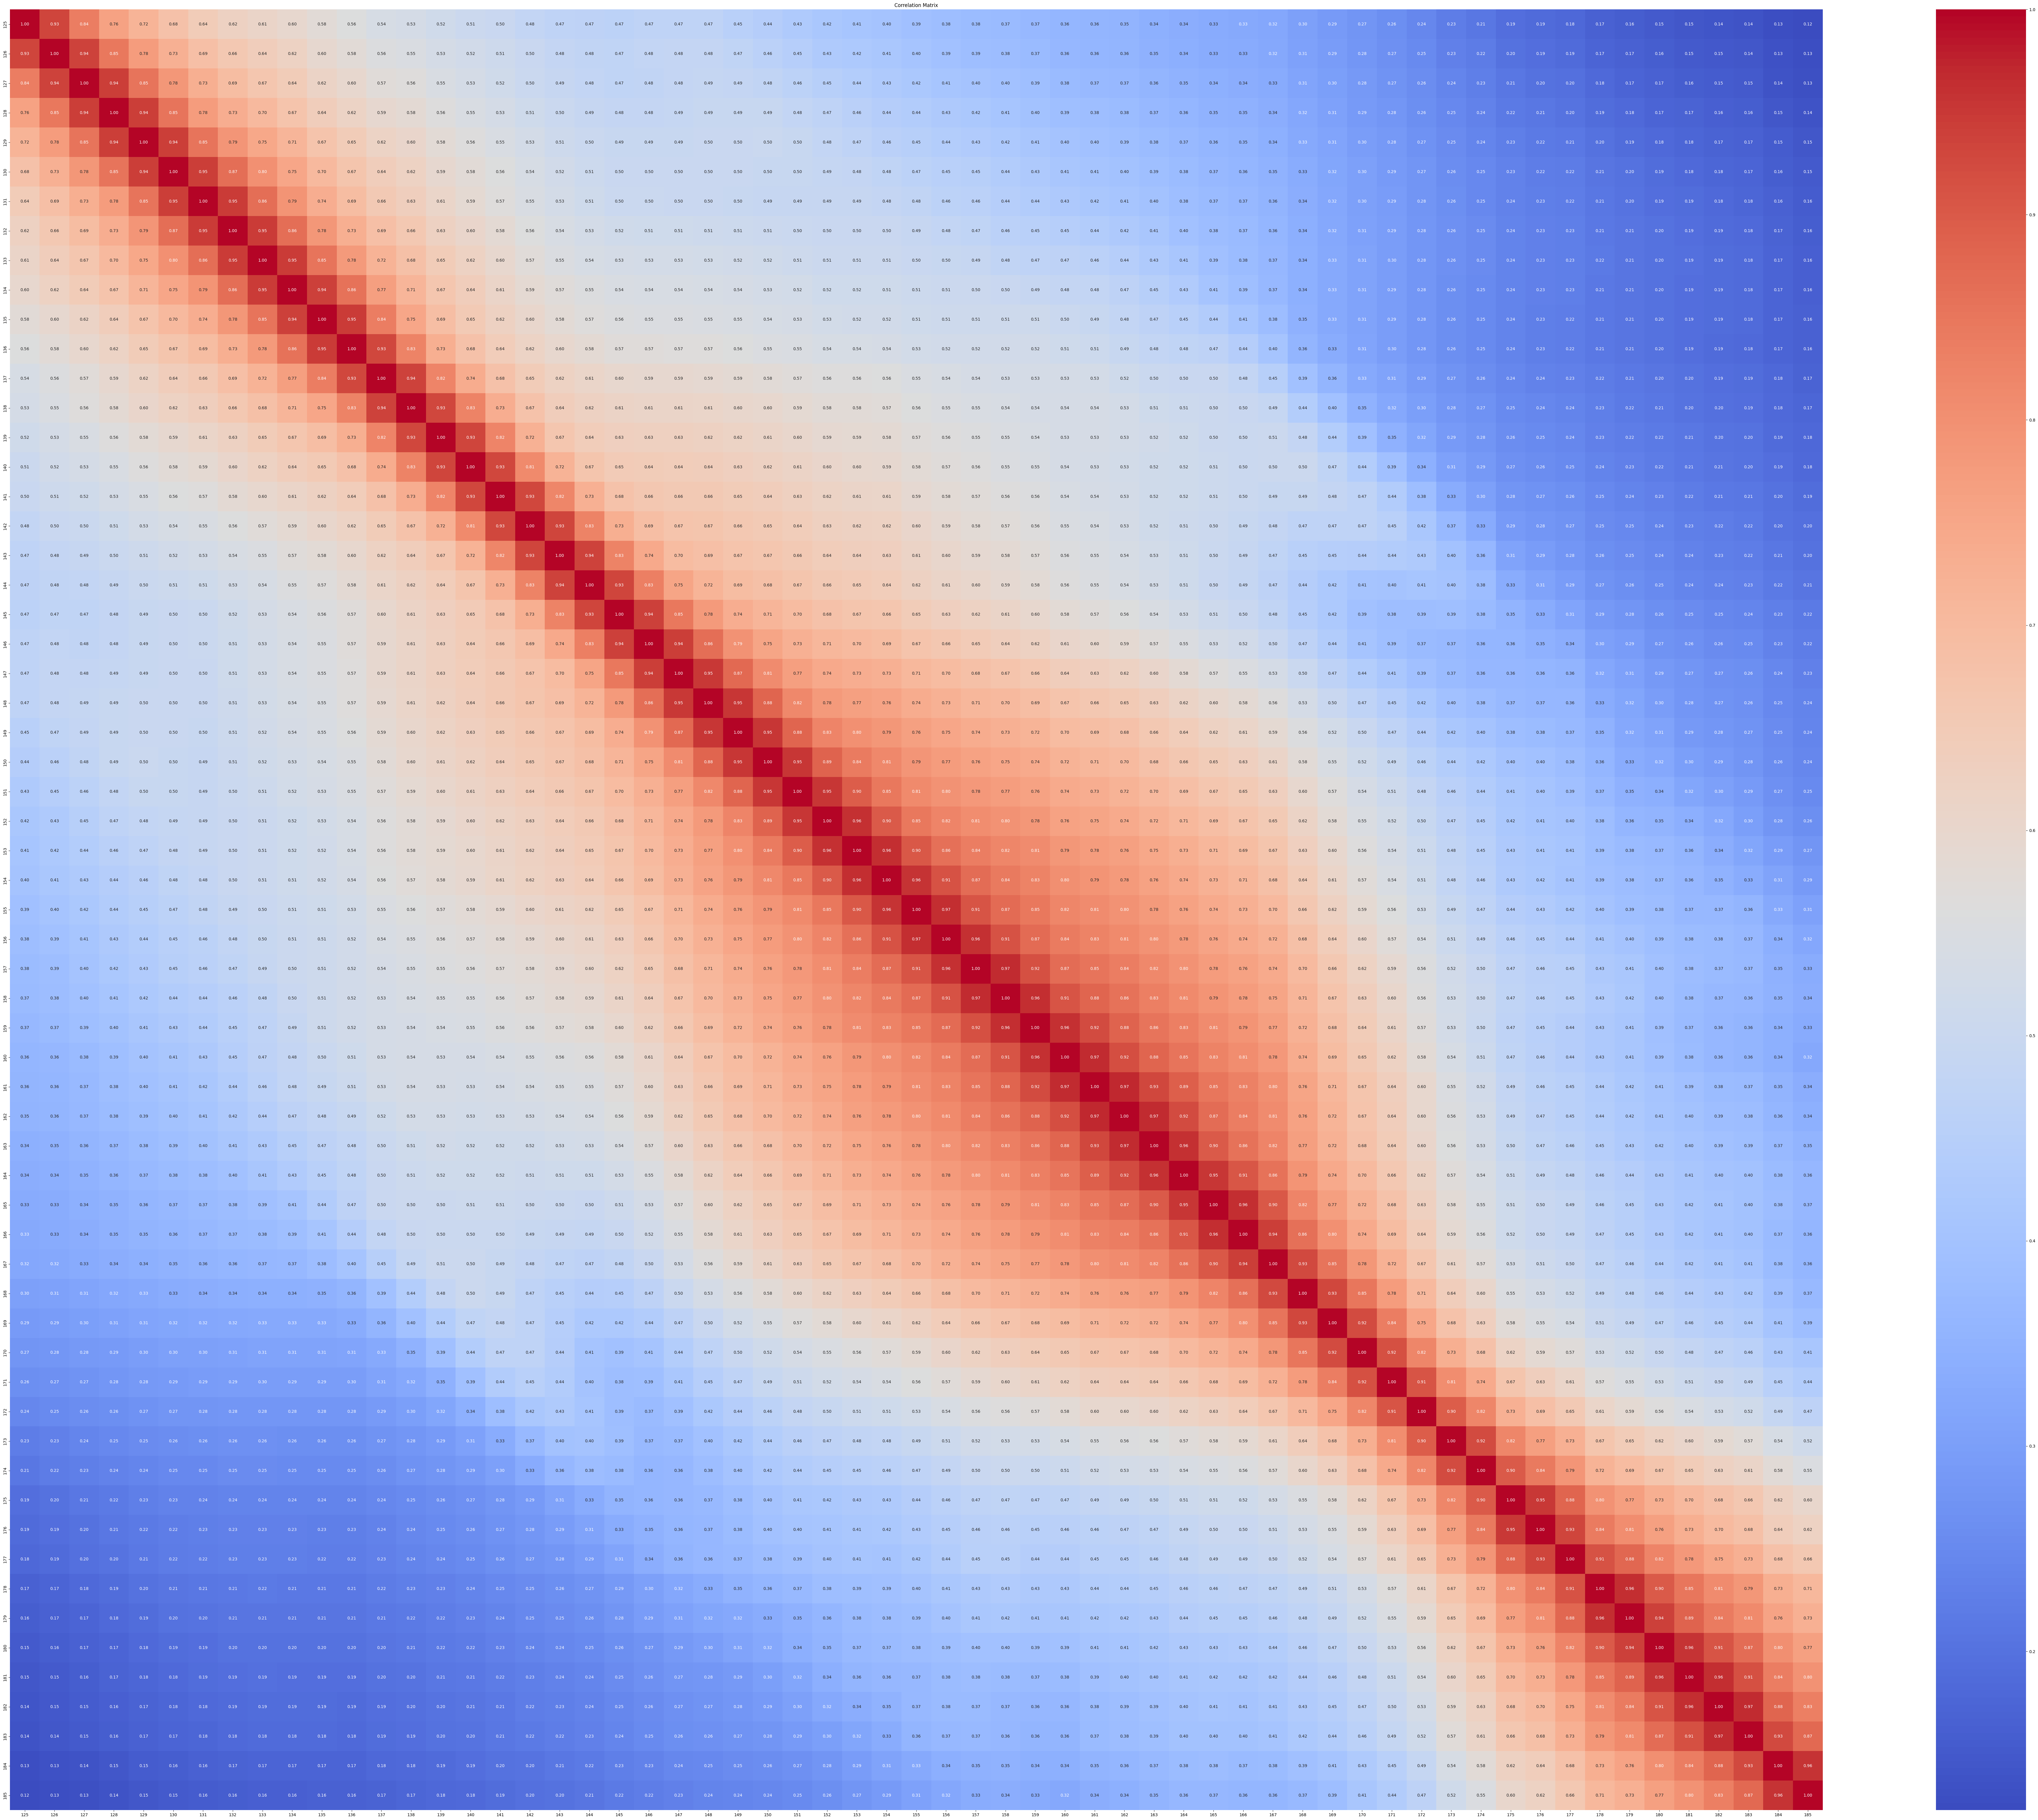

In [278]:
corr_matrix = df_test.iloc[:, 125:186].corr()
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [279]:
columns_to_drop = list(range(126, 187))
test_dropped = df_test.drop(columns=df_test.columns[columns_to_drop])
test_dropped

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...       117       118       119  \
0      0.049587  0.047521  0.035124  ...  0.041322  0.045455  0.043388   
1      0.307692  0.296703  0.300366  ...  0.000000  0.000000  0.000000   
2      0.123894  0.115044  0.132743  ...  0.000000  0.000000  0.000000   
3      0.004167  0.014583  0.054167  ...  0.000000  0.000000  0.000000   
4      0.080537  0.070470  0.090604  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
21887  0.250575  0.140230  0.102299  ...  0.316092  0.332184  0.347126   
21888  0.077728  0.112108  0.152466  ...  0.472347  0.535127  0.581465   
21889  0.100890  0.106825  0.100890  ...  0.106825  0.118694  0.109792   
21890  0.488095  0.392857  0.238095  ...  0.202381  0.238095  0.226190   
21891  0.426247  0.325380  0.279826  ...  0.187636  0.238612  0.250542   

            120       121       122       123       124  125  187  
0      0.049587  0.047521  0.064050  0.068182  0.000000  0.0  0.0  
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  
...         ...       ...       ...       ...       ...  ...  ...  
21887  0.393103  0.000000  0.000000  0.000000  0.000000  0.0  4.0  
21888  0.635277  0.656203  0.687593  0.684604  0.698057  0.0  4.0  
21889  0.112760  0.103858  0.000000  0.000000  0.000000  0.0  4.0  
21890  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  4.0  
21891  0.267896  0.251627  0.000000  0.000000  0.000000  0.0  4.0  

[21892 rows x 127 columns]

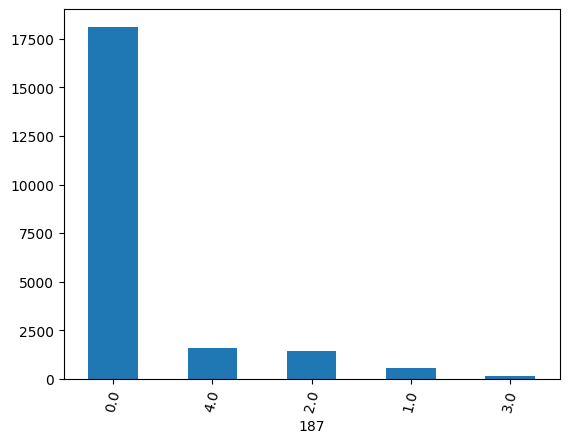

In [280]:
test_dropped[187].value_counts().plot(kind = 'bar', rot = 75)
plt.show()

In [281]:
X3 = df_test.drop(187, axis=1)
y3 = df_test[187]
print(y2.value_counts())
smote = SMOTE(k_neighbors=2) 
X3_resampled, y3_resampled = smote.fit_resample(X3, y3)
print('Original dataset shape:', Counter(y2))
print(y2_resampled.value_counts())

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64
Original dataset shape: Counter({0.0: 18118, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})
187
0.0    18118
1.0    18118
2.0    18118
3.0    18118
4.0    18118
Name: count, dtype: int64


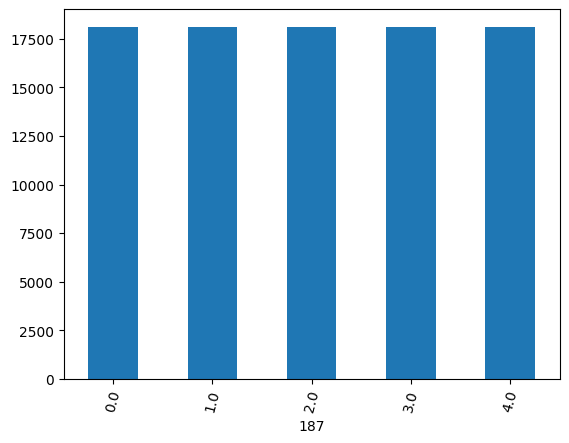

In [282]:
y3_resampled.value_counts().plot(kind = 'bar', rot = 75 )
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      3587
         1.0       0.97      0.99      0.98      3650
         2.0       0.98      0.98      0.98      3622
         3.0       0.99      1.00      0.99      3647
         4.0       0.99      0.99      0.99      3612

    accuracy                           0.98     18118
   macro avg       0.98      0.98      0.98     18118
weighted avg       0.98      0.98      0.98     18118

Confusion Matrix:
Accuracy Score:
0.98057180704272


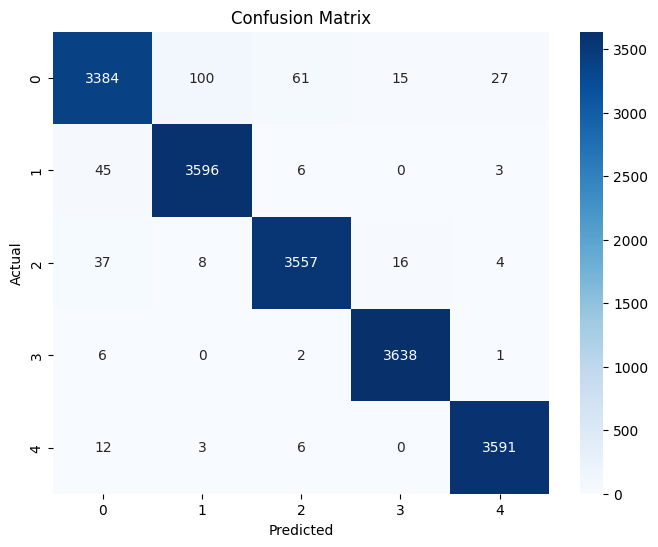

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X3_resampled, y3_resampled, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix:
[[3563   13    9    1    1]
 [   5 3645    0    0    0]
 [   3    0 3616    3    0]
 [   1    0    0 3646    0]
 [   2    0    0    0 3610]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3587
         1.0       1.00      1.00      1.00      3650
         2.0       1.00      1.00      1.00      3622
         3.0       1.00      1.00      1.00      3647
         4.0       1.00      1.00      1.00      3612

    accuracy                           1.00     18118
   macro avg       1.00      1.00      1.00     18118
weighted avg       1.00      1.00      1.00     18118

Accuracy Score:
0.9979026382602937


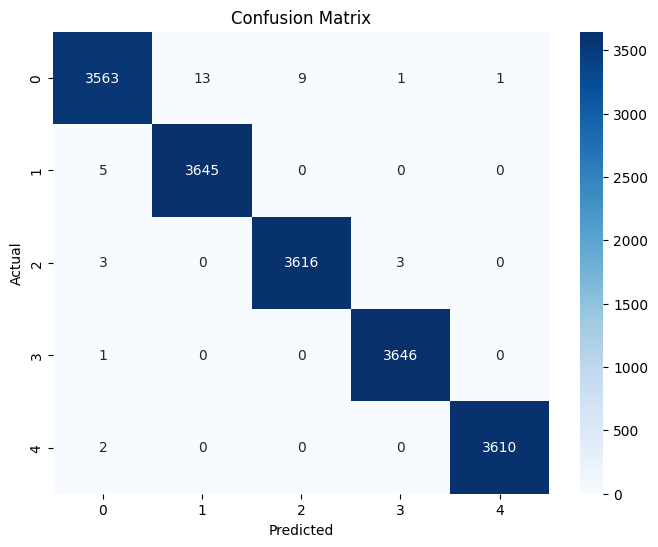

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X3_resampled, y3_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()